In [98]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

## XML (Extension Markup Language)
    
    1.특징
        1) 메타 언어 : GML -> SGML -> XML
        2) 데이터를 위한 언어
        3) 데이터베이스 용도
        4) 데이터 표준화 : 이 기종 시스템간의 정보교환, 웹서비스, 유비쿼터스, 사물인터넷 기타등등...
    
    2. 문법(물리적인 구성요소)
        1) XML(.xml)
        2) DTD(.dtd) : XML 작성을 위한 설계문서
        3) XML Schema(.xsd) : XML 작성을 위한 설계문서
        4) XSL(.xsl, xslt) : XML문서에 스타일을 입혀주는 언어
        
    3. 결과 문서의 종류
        1) Well-Formed XML Document(잘 짜여진 문서)
        2) Valid XML Document(유효한 문서)
   
    4. Element 문법
        - 작성 규칙
            a) 모든 XML문서는 반드시 단 하나의 루트 엘리먼트를 가진다.
            b) 루트 엘리먼트는 여러 개의 자식 엘리먼트를 가질 수 있고
                또 그 자식도 자신의 자식을 가질 수 있다.
            c) 시작태그와 끝태그는 반드시 짝을 이루어야 한다.
            d) "<"는 값으로 사용 불가. ">"는 사용할 수 있으나 가급적 사용 금지
            e) "<"와 ">" 다음에 공백문자가 올 수 없으며 반드시 시작태그와 끝태그의 이름이 같아야 한다.

        - 종류
            a) 내용을 가지는 엘리먼트
            b) 내용이 없는 엘리먼트

        - 내용에 대한 종류
            a) 문자 데이터
            b) 자식 엘리먼트
            c) 엔티티 또는 문자 참조
            d) CDATA Section
            e) 프로세싱 지시자
            f) 주석 : <!-- 주석 내용 -->
            g) 공백 문자열

    5. DTD 
        - 종류
            내부 DTD
            외부 DTD
        
        - 구성 요소
            엘리먼트 선언
            속성(attribute) 선언
            Entity 선언
            Notation 선언
            프로세싱 지시자
            파라미터 엔티티 참조
            주석
            공백
            conditional section

        - 문서 유형 선언
            <!DOCTYPE 루트엘리먼트명 SYSTEM 또는 PUBLIC "식별자">
                DOCTYPE은 반드시 대문자
                SYSTEM은 특정 단체나 업체내부에서 사용되는 경우
                PUBLIC은 공개
                식별자는 다운로드 받을 수 있는 경로
                PUBLIC일 경우 추가된 식별자
                +-//DTD를 개발 및 유지보수 업체명//DTD명 및 버전번호//사용된 언어

        - 엘리먼트 선언
            <!ELEMENT 엘리먼트명 컨텐트 유형>
                컨텐트 유형
                    #PCDATA	: 내용으로 문자데이터만 갖는 엘리먼트
                    자식 엘리먼트
                        , : 작성 순서
                        | : 선택
                        ? : 생략하거나 한번만 작성
                        + : 한번 이상
                        * : 생략하거나 여러번 작성
                        기호 없음 : 단 한번만 작성
                    EMPTY
                    MIXED : 문자데이터 또는 자식엘리먼트를 혼합형태
                    ANY

        - ATTRIBUTE 선언
            <!ATTLIST 엘리먼트명 속성명 속성유형 디폴트선언>
                속성 유형
                    CDATA :  문자 데이터
                    ENUMERATION	: dtd에 나열된 값 중 하나가 와야 함
                    ID : 유일한 값을 지정
                    IDREF/IDREFS : ID값을 참조
                    NMTOKEN/NMTOKENS : 이름 작성 규칙을 준수하는 데이터만 사용
                    NOTATION : dtd에 명시적으로 선언된 notation만 사용가능
                    ENTITY : dtd에 명시적으로 선언된 entity만 사용 가능
                    
        - validation check
            https://www.xmlvalidation.com/

    6. 네임 스페이스
        CML
        -----
            <?xml version=1.0>
            <정보>
                <고유번호>111111-1111111</고유번호>
                <이름>홍길동</이름>
                ...
            </정보>

        PML
        -----
            <?xml version=1.0>
            <정보>
                <고유번호>LC100</고유번호>
                <이름>캠코더</이름>
                ...
            </정보>

        OML
        -----
            <?xml version=1.0>
            <주문정보 xmlns:고객="http://www.a.com/2017/Custom"
                xmlns:상품="http://www.a.com/2017/Product"
                xmlns="http://www.a.com/2017/Order">
                <주문번호>1</주문번호>
                <주문수량>10</주문수량>
                <결제>
                    <방법>현금</방법>
                    <금액>10000000</금액>
                </결제>

                <고객:고유번호>111111-1111111</고객:고유번호>
                <고객:이름>홍길동</고객:이름>

                <상품:고유번호>LC100</상품:고유번호>
                <상품:이름>캠코더</상품:이름>
                ...
            </주문정보>

In [99]:
import xml.etree.ElementTree as elemTree

###### XML을 사용하는 방법
# 1. XML파일로 존재하는 경우 : parse()
# 2. XML문자열로 존재하는 경우 : fromstring()

### 1. XML 데이터 불러오기

In [2]:
tree1 = elemTree.parse("data/users.xml")
tree1

In [3]:
xmlstr = """<?xml version="1.0" encoding="utf-8" ?>
<users>
    <user grade="gold">
        <name>Kim Cheol Soo</name>
        <age>25</age>
        <birthday>19940215</birthday>
        </user>
        
    <user grade="diamond">
        <name>Kim Yoo Mee</name>
        <age>21</age>
        <birthday>19980417</birthday>
    </user>
</users>
"""

tree2 = elemTree.fromstring(xmlstr)
tree2

<Element 'users' at 0x000002155981BD10>

### 2. XML 데이터 다루기

#### (1) 태그명 검색

In [4]:
tree1.find("user")
tree1.find("user[1]")
data = tree1.find("user[2]")

In [7]:
print(data)
print(type(data))
dir(data)
print(data.tag)
print(data.attrib)
print(data.get("grade"))

print("-----------------------------------------")

username = data.find("name")
print(username.tag)
print(username.attrib)
print(username.text)

<Element 'user' at 0x00000215598C5720>
<class 'xml.etree.ElementTree.Element'>
user
{'grade': 'diamond'}
diamond
-----------------------------------------
name
{}
Kim Yoo Mee


#### (2) 태그 조건으로 검색

In [13]:
#data = tree1.find("./user[@grade]")
#data = tree1.find("./user[@grade][1]")
#data = tree1.find("./user[@grade][2]")

data = tree1.find("./user[@grade='diamond']")

print(data.attrib)
print(data.keys())
print(data.items())

{'grade': 'diamond'}
['grade']
[('grade', 'diamond')]


#### (3) 여러개의 태그를 한꺼번에 가져오기

In [15]:
users = tree1.findall("./user")
users

for user in users:
    print(user.attrib)
    print(user.find("name").text)

{'grade': 'gold'}
Kim Cheol Soo
{'grade': 'diamond'}
Kim Yoo Mee


#### (4) document sample

In [16]:
str = """<?xml version="1.0"?>
<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E" />
        <neighbor name="Switzerland" direction="W"/>
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N"/>
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W"/>
        <neighbor name="Colombia" direction="E"/>
    </country>
</data>
"""

tree3 = elemTree.fromstring(str)

In [24]:
# Singapore에 있는 이웃나라 이름은? Malaysia
# Panama에 있는 이웃나라 중 Costa Rica의 방향은? W
# 각 나라의 gdppc를 조회
# 각 나라의 인접국가 조회

country = tree3.find("./country[@name='Singapore']")
neighbor = country.find("neighbor")
print(neighbor.get("name"))

print("-------------------------------------------------------")

country = tree3.find("./country[@name='Panama']")
neighbor = country.find("neighbor[@name='Costa Rica']")
print(neighbor.get("direction"))

print("-------------------------------------------------------")

countrys = tree3.findall("./country")
for country in countrys:
    print(country.find("gdppc").text)
    
print("-------------------------------------------------------")


Malaysia
-------------------------------------------------------
W
-------------------------------------------------------
141100
59900
13600


In [7]:
import requests as req
health = req.get("http://www.k-health.com/rss/allArticle.xml")
tree4 = elemTree.fromstring(health.text)
tree4

<Element 'rss' at 0x000001CA138F5450>

## JSON(Javascript Object Notation)

In [8]:
import json

# dumps() : 데이터를 저장
# loads() : 데이터를 불러올 때

In [17]:
j1 = {"name":"홍길동", "birth":"0101", "age":20}
print(type(j1))
print(j1)

print("---------------------------------------------------------------")

# json 형식으로 저장
# j2 = json.dumps(j1)

# 들여쓰기 레벨을 주기 (indent = 2)
j2 = json.dumps(j1, indent=2)
print(type(j2))
print(j2)

print("---------------------------------------------------------------")
j3 = json.dumps([1, 2, 3])
print(j3)
print(type(j3))

print("---------------------------------------------------------------")
j4 = json.loads(j2)
print(j4)
print(type(j4))

<class 'dict'>
{'name': '홍길동', 'birth': '0101', 'age': 20}
---------------------------------------------------------------
<class 'str'>
{
  "name": "\ud64d\uae38\ub3d9",
  "birth": "0101",
  "age": 20
}
---------------------------------------------------------------
[1, 2, 3]
<class 'str'>
---------------------------------------------------------------
{'name': '홍길동', 'birth': '0101', 'age': 20}
<class 'dict'>


In [18]:
obj = """
{
	"id": "0001",
	"type": "donut",
	"name": "Cake",
	"ppu": 0.55,
	"batters":
		{
			"batter":
				[
					{ "id": "1001", "type": "Regular" },
					{ "id": "1002", "type": "Chocolate" },
					{ "id": "1003", "type": "Blueberry" },
					{ "id": "1004", "type": "Devil's Food" }
				]
		},
	"topping":
		[
			{ "id": "5001", "type": "None" },
			{ "id": "5002", "type": "Glazed" },
			{ "id": "5005", "type": "Sugar" },
			{ "id": "5007", "type": "Powdered Sugar" },
			{ "id": "5006", "type": "Chocolate with Sprinkles" },
			{ "id": "5003", "type": "Chocolate" },
			{ "id": "5004", "type": "Maple" }
		]
}
"""

print(type(obj))

<class 'str'>


In [21]:
result = json.loads(obj)
print(result)
print(type(result))
print("----------------------------------------------------------
print(result["batters"]["batter"][0]["id"])

{'id': '0001', 'type': 'donut', 'name': 'Cake', 'ppu': 0.55, 'batters': {'batter': [{'id': '1001', 'type': 'Regular'}, {'id': '1002', 'type': 'Chocolate'}, {'id': '1003', 'type': 'Blueberry'}, {'id': '1004', 'type': "Devil's Food"}]}, 'topping': [{'id': '5001', 'type': 'None'}, {'id': '5002', 'type': 'Glazed'}, {'id': '5005', 'type': 'Sugar'}, {'id': '5007', 'type': 'Powdered Sugar'}, {'id': '5006', 'type': 'Chocolate with Sprinkles'}, {'id': '5003', 'type': 'Chocolate'}, {'id': '5004', 'type': 'Maple'}]}
<class 'dict'>
1001


## BeautifulSoup

#### (1) 웹 소스 가져오기

In [23]:
import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError

<class 'bytes'>
b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec
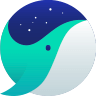
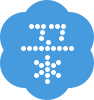

In [29]:
google = urlopen("https://www.naver.com")
html = google.read()
print(type(html))
print(html)

In [31]:
try:
    google = urlopen("https://www.naver123.com")
    html = google.read()
except HTTPError as e:
    print("HTTP Error 입니다. : ", e)
except URLError as e:
    print("URL Error 입니다. : ", e)
else:
    html = google.read()

URL Error 입니다. :  <urlopen error [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다>


In [33]:
##### 이미지 가져오기

# daum.png에 저장하기
req.urlretrieve("https://t1.daumcdn.net/daumtop_chanel/op/20200723055344399.png","data/daum.png")

('data/daum.png', <http.client.HTTPMessage at 0x1ca0fbb6670>)

In [37]:
img = urlopen("https://t1.daumcdn.net/daumtop_chanel/op/20200723055344399.png")
img_data = img.read()

f = open("data/daum2.png","wb")
f.write(img_data)
f.close()

In [44]:
import urllib.parse

##### 요청 방식
# 프로토콜 ://서버주소:포트번호/폴더 또는 파일명# 섹션명
# 프로토콜 ://서버주소:포트번호/폴더 또는 파일명?변수명=값&변수명=값

# http://www.weather.go.kr/weather/lifenindustry/sevice_rss.jsp

api = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
value = {"stnld" : 109}

params = urllib.parse.urlencode(value)
print(params)

url = api + "?" + params
print(url)

data = urlopen(url).read()
print(data.decode("utf-8"))

stnld=109
http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2021년 11월 09일 (화)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2021년 11월 09일 (화)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>202111090600</tm>
		<wf><![CDATA[○ (강수) 12일(금) 오전에는 전라권과 제주도에 비가 오겠고, 14일(일) 오후에는 수도권과 강원영서에 비가 오겠습니다.   <br />○ (기온) 이번 예보기간 아침 기온은 -2~10도로 어제(8일, 아침 기온 9~18도)보다 많이 낮겠고, <br />          낮 기온은 9~18도로 어제(8일, 낮 기온 9~21도)보다 조금 낮겠으며, 바람도 강하게 불어 춥겠습니다.<br />○ (해상) 12일(금)까지 대부분 해상에서 물결이 2.0~4.0m로 매우 높게 일겠습니다.<br />○ (주말전망) 1

#### (2) BeautifulSoup 사용법

In [100]:
from bs4 import BeautifulSoup

In [52]:
page = open("data/test_first.html").read()
page # 문자열 

soup = BeautifulSoup(page, "html.parser") # tree구조로 변경
print(soup.prettify())


<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by Netsong7
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://netsong7.synology.me" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


In [101]:
##### 원하는 위치에 접근하는 방법(순차적인 방식)

list(soup.children)
list(soup.children)[0]
list(soup.children)[1]

# 실제로 필요한 내용
list(soup.children)[2]

TypeError: 'ResultSet' object is not callable

In [64]:
html = list(soup.children)[2]
list(html.children)

list(html.children)[0]
body = list(html.children)[1]

list(body.children)

['\n',
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>,
 '\n',
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 '\n',
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>,
 '\n']

In [68]:
##### 태그명으로 접근하는 방법
soup.head
soup.body
soup.body.div
soup.body.div.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>

In [71]:
##### find(), find_all()

soup.find("p")
soup.find_all("p")

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [81]:
soup.find("p", class_="outer-text")

<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>

In [79]:
soup.find("p", id="second")

<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>

In [87]:
soup.head

# head 다음 형제(같은level)로 이동 
soup.head.next_sibling

# body의 이전 형제로 이동
soup.body.previous_sibling

soup.body.previous_sibling.next_sibling

soup.body.div.parent

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [91]:
##### 데이터(Text node)(단말노드)가져오기

soup.html.get_text()
soup.head.get_text()
soup.title.get_text()
soup.div.get_text()

for p in soup.find_all("p"):
    print(p.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



In [94]:
##### 속성에 접근하기

link = soup.find("a")
link

link["href"]

for n in soup.find_all("a"):
    print(n["href"])

http://netsong7.synology.me
https://www.python.org


## 실습 예제

### (1) 네이버에서 환율 정보 가져오기

+ https://finance.naver.com/marketindex/

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://finance.naver.com/marketindex/"
page = urlopen(url)
page

soup = BeautifulSoup(page, "html.parser")

In [3]:
span = soup.find_all("span", class_="value")

print("미 환율 : ",span[0].get_text())

미 환율 :  1,182.80


In [4]:
div = soup.find_all("div",class_="head_info")
div
span = div[0].find_all("span")
span

print("미 환율 :", span[0].get_text(), "상승 : ",span[3].get_text())

미 환율 : 1,182.80 상승 :  6.80


In [5]:
# CSS
span = soup.select_one("div.head_info > span.value") # class 일땐 . id일땐 #
print(span.get_text())

1,182.80


### (2) 스크래핑 연습

In [6]:
url = "http://www.pythonscraping.com/pages/warandpeace.html"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

In [7]:
###### 녹색 단어만 골라오기

span = soup.find_all("span",class_="green")
for s in span:
    print(s.get_text())
    
print("-"*80)

span2 = soup.find_all("span", {"class":"green"})
for s in span2:
    print(s.get_text())
    
print("-"*80)

span3 = soup.select("div#text > span.green")
for s in span3:
    print(s.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna
--------------------------------------------------------------------------------
Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowag

In [8]:
##### 제목 추출
# h1, h2, h3, ... , h6
# 보통 h1 ~ h3 까지 제목으로 사용한다.

title1 = soup.find_all({"h1","h2","h3"})
for t in title:
    print(t.get_text())


print("-"*70)

title2 = soup.select("h1,h2")
for t in title2:
    print(t.get_text())

print("-"*70)

print([title.get_text() for title in title1])

NameError: name 'title' is not defined

In [9]:
##### 녹색과 적색단어 추출

color1 = soup.select("div#text > span.red,span.green")
for i in color1:
    print(i.get_text())
    
print("-"*70)

color2 = soup.find_all("span",{"class" : ["green","red"]})
for i in color2:
    print(i.get_text())

Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.
If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.
Heavens! what a virulent attack!
First of all, dear friend, tell me how you are. Set your friend's
mind at rest,
Can one be well while suffering morally? Can one be calm in times
like these if one has any feeling?
You are
staying the whole evening, I hope?
And the fete at the English ambassador's? Today is Wednesday.

In [10]:
url = "http://www.pythonscraping.com/pages/page3.html"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

In [11]:
##### 제목행을 제외하고 나머지 모든 행 리스트를 수집

list = soup.find_all("tr", {"class":"gift"})
for i in list:
    print(i.get_text())
    
print("-"*80)

for i in range(5):
    table = soup.find_all("tr",id="gift{}".format(i))
    
    for m in table:
        print(m.get_text())
        
print("-"*80)

for i in soup.select("tr.gift"):
    print(i.get_text())





Vegetable Basket

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!

$15.00




Russian Nesting Dolls

Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!

$10,000.52




Fish Painting

If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!

$10,005.00




Dead Parrot

This is an ex-parrot! Or maybe he's only resting?

$0.50




Mystery Box

If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!

$1.50



--------------------------------------------------------------------------------

Vegetable Basket

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!

$15.00




Russian 

In [12]:
import bs4

tr = soup.find("table",{"id": "giftList"}).tr.next_siblings
for t in tr:
    if (type(t) == bs4.element.Tag):
        print(t.get_text())
        #print(t.img['src'])
        print(list(t.children)[3].img["src"])


Vegetable Basket

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!

$15.00





TypeError: 'ResultSet' object is not callable

In [18]:
##### 가격 중에 $15.00 수집

td = soup.find_all("td")
print(td[2].get_text())

print("-------------------------------------------")

print(soup.select("td")[2].get_text())

print("-------------------------------------------")

print(soup.find("img", src="../img/gifts/img1.jpg").parent.previous_sibling.get_text())


$15.00

-------------------------------------------

$15.00

-------------------------------------------

$15.00

